## Classify Recipes based on Ingredients

## Setup
- `pandas`
- `numpy`
- `sklearn`
- `seaborn`
- `matplotlib`

## Installation
- pip install pandas
- pip install numpy
- pip install scikit-learn
- pip install matplotlib

## Import Libraries

In [1]:
from tqdm import tqdm
import json
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score

## Data Ingesion
- Credits: [cognitiveclass.ai](https://apps.cognitiveclass.ai/learning/course/course-v1:IBM+GPXX04XREN+v1/block-v1:IBM+GPXX04XREN+v1+type@sequential+block@guided_project/block-v1:IBM+GPXX04XREN+v1+type@vertical+block@guided_project_lets_do_it)

In [2]:
## Uncomment below cell to download data

# data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-PY0181EN-SkillsNetwork/labs/2_linear_classifiers/data/data.json"

# !wget -O cuisine_classify.json data_url

In [3]:
!ls ../

01-Introduction  03-Numpy   05-Matplotlib   projects
02-Statistics	 04-Pandas  06-Probability  text-mining


**pd.read_json**

In [10]:
DATA_PATH = '../../Data/cuisine_classify.json'

df_cuisine = pd.read_json(DATA_PATH)
df_cuisine.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [11]:
# check shape
df_cuisine.shape

(39774, 3)

In [12]:
# top five rows
df_cuisine.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [13]:
# Target Distribution
df_cuisine['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

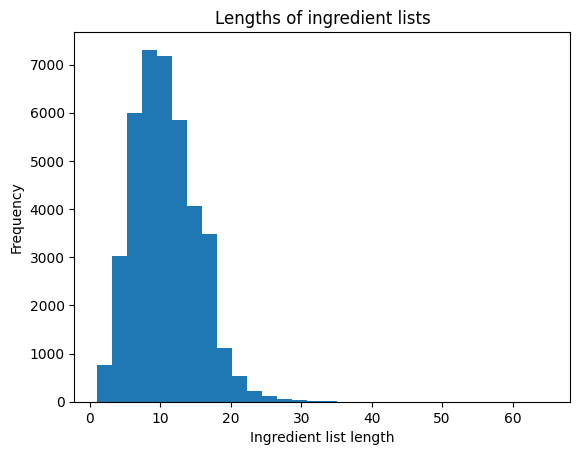

In [14]:
# histogram
plt.hist(df_cuisine['ingredients'].apply(lambda x: len(x)), bins = 30)
plt.title("Lengths of ingredient lists")
plt.xlabel("Ingredient list length")
plt.ylabel("Frequency")
plt.show()

**Text Vectorization**
- It is the process of converting textual data into numerical vectors.
- We'll use scikit-learn `CountVectorizer`
- It converts collection of text documents to a matrix of token counts.

In [27]:
# get first ingredients
print(df_cuisine.loc[0, 'ingredients'])
print(f"Type: {type(df_cuisine.loc[0, 'ingredients'])}")

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Type: <class 'list'>


In [30]:
# Convert list into one string
# Column: ingredients

ingredients = df_cuisine['ingredients'].astype(str).apply(lambda x: x.strip('[]'))
ingredients

0        'romaine lettuce', 'black olives', 'grape toma...
1        'plain flour', 'ground pepper', 'salt', 'tomat...
2        'eggs', 'pepper', 'salt', 'mayonaise', 'cookin...
3                'water', 'vegetable oil', 'wheat', 'salt'
4        'black pepper', 'shallots', 'cornflour', 'caye...
                               ...                        
39769    'light brown sugar', 'granulated sugar', 'butt...
39770    'KRAFT Zesty Italian Dressing', 'purple onion'...
39771    'eggs', 'citrus fruit', 'raisins', 'sourdough ...
39772    'boneless chicken skinless thigh', 'minced gar...
39773    'green chile', 'jalapeno chilies', 'onions', '...
Name: ingredients, Length: 39774, dtype: object

In [31]:
# Apply Count Vectorization
cv = CountVectorizer(ngram_range=(1, 2), max_features=200)
tf = cv.fit_transform(ingredients)

tf

<39774x200 sparse matrix of type '<class 'numpy.int64'>'
	with 728408 stored elements in Compressed Sparse Row format>

In [37]:
# get feature vector dataframe

df_vectorized = pd.DataFrame(tf.toarray(), columns=cv.get_feature_names_out())
df_vectorized

,all,all purpose,avocado,baking,baking powder,basil,bay,beans,beef,bell,...,vegetable oil,vinegar,virgin,virgin olive,water,white,white wine,whole,wine,yellow
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


- **Observations**
    - Our columns contains single word (unigram) and pair of words (bigram)
    - There are 39774 rows which is total samples, and 200 columns with many 0's. This means matrix is very sparse.

- Several Other Options for vectorization
    - `tf-idf` matrix
    - Word Embeddings (`word2vec`, `GLOVE`, `BERT` and so on)

## Modeling
- Now, Let's Build Classifier to classify among several Cuisines.
- Algorithms:
    - Logistic Regression.

In [ ]:
# Train Test Split
#